In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pymc3 as pm
from numpy import random
from scipy import stats

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Populating the interactive namespace from numpy and matplotlib


In [2]:
#color blindness safe colors
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

newparams = {
  "lines.linewidth": 2.0,
  "axes.edgecolor": "#aaaaaa",
  "patch.linewidth": 1.0,
  "legend.fancybox": 'false',
  "axes.color_cycle": kelly_colors_hex,
  "axes.facecolor": "#ffffff",
  "axes.labelsize": "large",
  "axes.grid": 'false',
  "patch.edgecolor": "#555555",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
}
plt.rcParams.update(newparams)

C:\Users\Neil\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
stocks = Quandl.get(["NASDAQOMX/COMP","YAHOO/AAPL"], trim_start="2005-9-1", 
                      trim_end="2015-9-1")
stocks = stocks[['NASDAQOMX.COMP - Index Value','YAHOO.AAPL - Adjusted Close']]
stocks.columns=['NASDAQ','Aapl']

(0, 1.25)

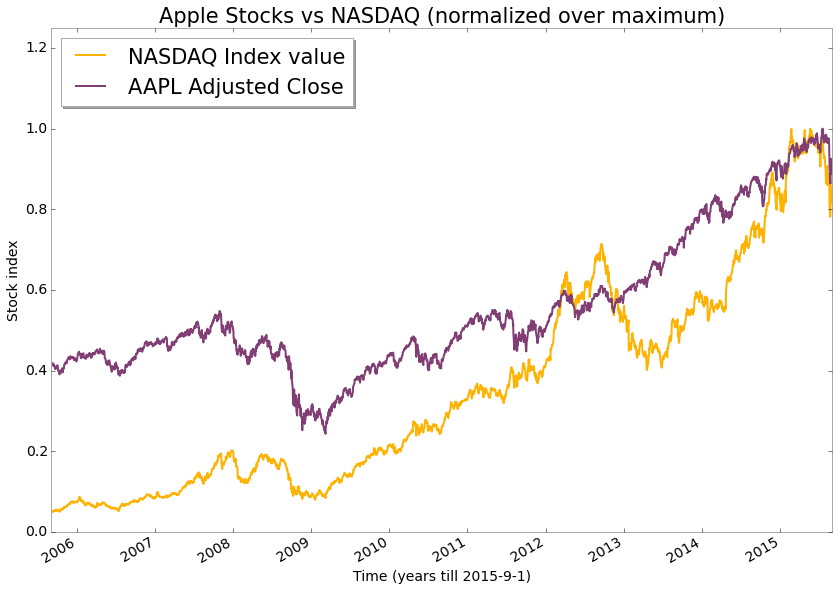

In [6]:
ax = plt.figure(figsize = (14,10)).add_subplot(111)
aaplN=stocks['Aapl']/max(stocks['Aapl'])
nasdaqN=stocks['NASDAQ']/max(stocks['NASDAQ'])
aaplN.plot()
plt.title('Apple Stocks vs NASDAQ (normalized over maximum)', fontsize=21)
nasdaqN.plot()
plt.xlabel('Time (years till 2015-9-1)', fontsize = 14)
plt.ylabel('Stock index', fontsize = 14)
plt.legend({'NASDAQ Index value','AAPL Adjusted Close'}, loc = 2, fontsize = 21, shadow = True)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()]
plt.ylim (0, 1.25)

                                  To see similarities between NASDAQ and Apple stocks